Import libraries

In [6]:
import csv
import copy
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
from NaiveBayesClassifier import NaiveBayesClassifier

Data loading

In [7]:
def read_csv(file_path):
    data=[]
    with open(file_path, 'r', encoding='utf-8') as file:
        csv_reader=csv.reader(file)
        for row in csv_reader:
            data.append(row)
    return data

def encoding(data):
    for i in range(1, len(data)):
        if data[i][0]=="5":
            data[i][0]=1
        else:
            data[i][0]=0
    return data

# Changinng csv paths is recommended.
train_data=read_csv("train.csv")
test_data=read_csv("test.csv")

train_data=encoding(train_data)
test_data=encoding(test_data)

In [8]:
file=open("stopwords.txt", "r")
stopwords=file.read()
stopwords=stopwords.split("\n")

Training

In [9]:
nbc=NaiveBayesClassifier()
train_features=nbc.fit(train_data, stopwords)

print("Top 20-50 words from the selected features:", train_features[19:50])

Top 20-50 words from the selected features: ['well', 'order', 'told', 'didn', 'going', 'first', 'am', 'love', 'down', 'staff', 'minutes', 'ordered', 'now', 'way', 'day', 'chicken', 'restaurant', 'came', '2', 'nice', 'car', 'take', 'still', 'see', 'asked', 'little', 'store', 'made', 'try', 'want', 'experience']


In [11]:
pred=nbc.predict(test_data)

In [12]:
answer=[]
for i in range(1, len(test_data)):
    answer.append(int(test_data[i][0]))

Evalutaion

In [13]:
def confusion_matrix(pred, answer):
    TP=0
    TN=0
    FP=0
    FN=0

    for i in range(len(answer)):
        if answer[i]==pred[i]:
            if answer[i]==1:
                TP=TP+1
            else:
                TN=TN+1
        if answer[i]!=pred[i]:
            if answer[i]==0:
                FN=FN+1
            else:
                FP=FP+1
    return [[TN, FP],
            [FN, TP]]


def eval(pred, answer):
    TP=0
    TN=0
    FP=0
    FN=0

    for i in range(len(pred)):
        if answer[i]==pred[i]:
            if answer[i]==1:
                TP=TP+1
            else:
                TN=TN+1
        if answer[i]!=pred[i]:
            if answer[i]==0:
                FN=FN+1
            else:
                FP=FP+1

    accuracy=(TP+TN)/(TP+TN+FP+FN)
    precision=TP/(TP+FP)
    recall=TP/(TP+FN)
    f1_score=2*(precision*recall)/(precision+recall)

    return accuracy, precision, recall, f1_score

<Axes: >

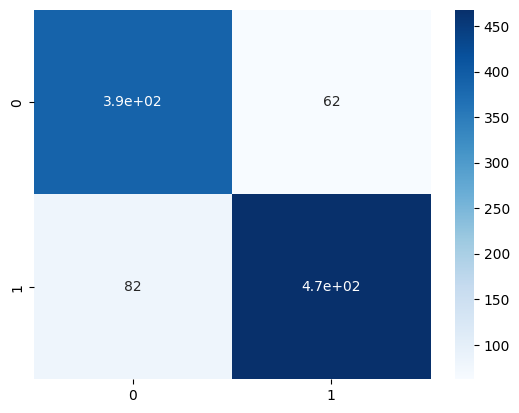

In [14]:
cf_matrix=confusion_matrix(pred, answer)
sns.heatmap(cf_matrix, annot=True, cmap="Blues")

In [15]:
accuracy, precision, recall, f1_score=eval(pred, answer)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)

Accuracy: 0.856
Precision: 0.8830188679245283
Recall: 0.850909090909091
F1-score: 0.8666666666666667


Learning Curve Analysis

In [16]:
train_data=read_csv("train.csv")
test_data=read_csv("test.csv")

train_data=encoding(train_data)
test_data=encoding(test_data)

In [17]:
train_answer=[]
for i in range(1, len(train_data)):
    train_answer.append(train_data[i][0])

In [18]:
# 10% of train data
train_one=train_data[:1+int(len(train_data)*0.1)]

# 30% of train data
train_two=train_data[:1+int(len(train_data)*0.3)]

# 50% of train data
train_three=train_data[:1+int(len(train_data)*0.5)]

# 70% of train data
train_four=train_data[:1+int(len(train_data)*0.7)]

In [19]:
nbc=NaiveBayesClassifier()
nbc.fit(copy.deepcopy(train_one), stopwords)
train_pred_one=nbc.predict(copy.deepcopy(train_one))
pred_one=nbc.predict(copy.deepcopy(test_data))

nbc=NaiveBayesClassifier()
nbc.fit(copy.deepcopy(train_two), stopwords)
train_pred_two=nbc.predict(copy.deepcopy(train_two))
pred_two=nbc.predict(copy.deepcopy(test_data))

nbc=NaiveBayesClassifier()
nbc.fit(copy.deepcopy(train_three), stopwords)
train_pred_three=nbc.predict(copy.deepcopy(train_three))
pred_three=nbc.predict(copy.deepcopy(test_data))

nbc=NaiveBayesClassifier()
nbc.fit(copy.deepcopy(train_four), stopwords)
train_pred_four=nbc.predict(copy.deepcopy(train_four))
pred_four=nbc.predict(copy.deepcopy(test_data))

nbc=NaiveBayesClassifier()
nbc.fit(copy.deepcopy(train_data), stopwords)
train_pred_five=nbc.predict(copy.deepcopy(train_data))
pred_five=nbc.predict(copy.deepcopy(test_data))

In [20]:
train_one_accuracy=eval(train_pred_one, train_answer)[0]
one_accuracy=eval(pred_one, answer)[0]
print("train:", train_one_accuracy, "\ttest:", one_accuracy)

train_two_accuracy=eval(train_pred_two, train_answer)[0]
two_accuracy=eval(pred_two, answer)[0]
print("train:", train_two_accuracy, "\ttest:", two_accuracy)

train_three_accuracy=eval(train_pred_three, train_answer)[0]
three_accuracy=eval(pred_three, answer)[0]
print("train:", train_three_accuracy, "\ttest:", three_accuracy)

train_four_accuracy=eval(train_pred_four, train_answer)[0]
four_accuracy=eval(pred_four, answer)[0]
print("train:", train_four_accuracy, "\ttest:", four_accuracy)

train_five_accuracy=eval(train_pred_five, train_answer)[0]
five_accuracy=eval(pred, answer)[0]
print("train:", train_five_accuracy, "\ttest:", five_accuracy)

train: 0.9325 	test: 0.768
train: 0.885 	test: 0.827
train: 0.884 	test: 0.844
train: 0.88 	test: 0.853
train: 0.8765 	test: 0.856


Text(0, 0.5, 'Accuracy')

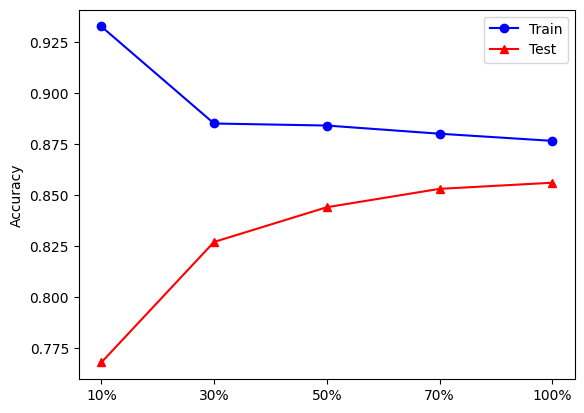

In [21]:
x=["10%", "30%", "50%", "70%", "100%"]
y1=[train_one_accuracy, train_two_accuracy, train_three_accuracy, train_four_accuracy, train_five_accuracy]
y2=[one_accuracy, two_accuracy, three_accuracy, four_accuracy, five_accuracy]

plt.plot(x, y1, 'bo-')
plt.plot(x, y2, 'r^-')

plt.legend(('Train', 'Test'))
plt.ylabel('Accuracy')